## Observations and Insights 

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata,study_results,on='Mouse ID')
# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
# Checking the number of mice.
len(mouse_study['Mouse ID'].unique())

249

In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study[mouse_study.duplicated(subset=['Mouse ID','Timepoint'],keep='first')]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [20]:
# Optional: Get all the data for the duplicate mouse ID. 



In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = mouse_study.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='first')
clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse['Mouse ID'].unique())

249

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen = clean_mouse.groupby('Drug Regimen')
regimen_df = regimen.mean()
regimen_df = regimen_df[['Tumor Volume (mm3)']]
regimen_df = regimen_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Mean (mm3)'})
median_df = regimen.median()
median_df = median_df[['Tumor Volume (mm3)']]
median_df = median_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Median (mm3)'})
variance_df = regimen.var()
variance_df = variance_df[['Tumor Volume (mm3)']]
variance_df = variance_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Variance'})
std_df = regimen.std()
std_df = std_df[['Tumor Volume (mm3)']]
std_df = std_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume STD'})
sem_df = regimen.sem()
sem_df = sem_df[['Tumor Volume (mm3)']]
sem_df = sem_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume SEM'})
regimen_df = pd.merge(regimen_df,median_df,on='Drug Regimen')
regimen_df = pd.merge(regimen_df,variance_df,on='Drug Regimen')
regimen_df = pd.merge(regimen_df,std_df,on='Drug Regimen')
regimen_df = pd.merge(regimen_df,sem_df,on='Drug Regimen')
regimen_df

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

## Bar and Pie Charts

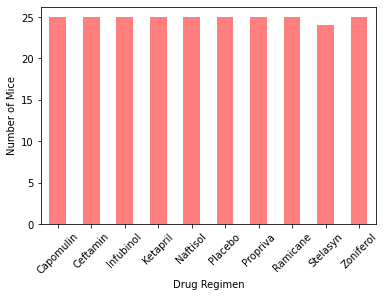

In [70]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_count = clean_mouse.groupby('Drug Regimen')['Mouse ID'].nunique()
mouse_barpd = mouse_count.plot(kind='bar',color='red',alpha=0.5,rot=45)
mouse_barpd.set_ylabel('Number of Mice')
mouse_barpd
plt.show()

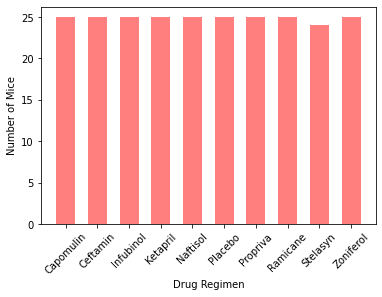

In [71]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mouse_count_df = pd.DataFrame(mouse_count)
mouse_count_df = mouse_count_df.reset_index()
x_axis = np.arange(len(mouse_count_df['Drug Regimen']))
plt.bar(x_axis,mouse_count_df['Mouse ID'],width=0.6,color='red',alpha=0.5,align='center')
plt.xticks(x_axis,mouse_count_df['Drug Regimen'],rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
